# Finding the Distance Between Two Points

In [3]:
!pip install numpy
import numpy as np

    100% |████████████████████████████████| 12.2MB 61kB/s  eta 0:00:01   18% |█████▉                          | 2.2MB 12.6MB/s eta 0:00:01    23% |███████▍                        | 2.8MB 13.1MB/s eta 0:00:01    28% |█████████                       | 3.4MB 12.4MB/s eta 0:00:01    38% |████████████▎                   | 4.7MB 13.0MB/s eta 0:00:01    43% |██████████████                  | 5.3MB 14.7MB/s eta 0:00:01    63% |████████████████████▍           | 7.8MB 13.5MB/s eta 0:00:01    66% |█████████████████████▏          | 8.1MB 5.1MB/s eta 0:00:01    85% |███████████████████████████▌    | 10.4MB 15.1MB/s eta 0:00:01    97% |███████████████████████████████▏| 11.8MB 12.4MB/s eta 0:00:01


In [10]:
def distance(p1, p2):
    """""Find the distance between point p1 and p2"""
    return np.sqrt(np.sum(np.power(p2 - p1,2)))

p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1, p2)

4.242640687119285

# Majority vote

In [56]:
!pip install scipy

import random
import scipy.stats as ss

def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners = []
    max_counts = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
            
    return random.choice(winners)
    
votes = [1,2,3,1,1,2,2,3,1,3,3,1,1,2]
winner = majority_vote(votes)
print(winner)

    100% |████████████████████████████████| 50.0MB 14kB/s  eta 0:00:01 1% |▌                               | 788kB 7.2MB/s eta 0:00:07    3% |█                               | 1.7MB 10.1MB/s eta 0:00:05    6% |██                              | 3.1MB 10.4MB/s eta 0:00:05    7% |██▎                             | 3.6MB 10.6MB/s eta 0:00:05    10% |███▎                            | 5.0MB 7.4MB/s eta 0:00:07    10% |███▌                            | 5.4MB 31.7MB/s eta 0:00:02    14% |████▊                           | 7.4MB 16.8MB/s eta 0:00:03    20% |██████▋                         | 10.3MB 10.5MB/s eta 0:00:04    21% |██████▉                         | 10.7MB 5.9MB/s eta 0:00:07    23% |███████▍                        | 11.6MB 18.5MB/s eta 0:00:03    24% |████████                        | 12.5MB 18.4MB/s eta 0:00:03    26% |████████▍                       | 13.2MB 10.3MB/s eta 0:00:04    28% |█████████                       | 14.1MB 8.6MB/s eta 0:00:05    28% |█████████▎                   

In [53]:
votes = [random.randint(1,3) for i in range(100)]
winner = majority_vote(votes)
print(winner)

1


In [66]:
def majority_vote2(votes):
    
    vote_counts = {}
    mode, count = ss.mstats.mode(votes)            
    return mode
    
votes = [random.randint(1,3) for i in range(100)]
winner = majority_vote(votes)
print(winner)

2


# Finding Nearest Neighbors

In [76]:
!pip install matplotlib
import matplotlib.pyplot as plt

# loop over all points
    # compute the distance between p and every other points
# sort distances and return those k points that are nearest to point p

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

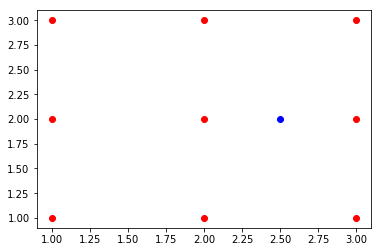

In [78]:
plt.plot(points[:,0], points[:,1], "ro");
plt.plot(p[0], p[1], "bo")
#plt.axis([0.5, 3.5, 0,5, 3.5])

In [81]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])
    
print(distances)

[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]


In [94]:
ind = np.argsort(distances)
print(ind)

[4 7 3 5 6 8 1 0 2]


In [85]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [87]:
distances[ind[0:2]]

array([0.5, 0.5])

In [90]:
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [92]:
ind = find_nearest_neighbors(p, points)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]
 [3 1]]


In [93]:
ind = find_nearest_neighbors(p, points, k =2)
print(points[ind])

[[2 2]
 [3 2]]


In [95]:
def knn_predict(p, points, outcomes, k=5):
    # find k nearest neighbors
    ind = find_nearest_neighbors(p, points, k)
    # predict the class p based on majority vote
    return majority_vote2(outcomes[ind])
    
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

array([1.])

In [96]:
knn_predict(np.array([0, 2.3]), points, outcomes, k=2)

array([0.])

# Generating Synthetic Data

In [122]:
def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

In [123]:
n=20
points, outcomes = generate_synth_data(20)

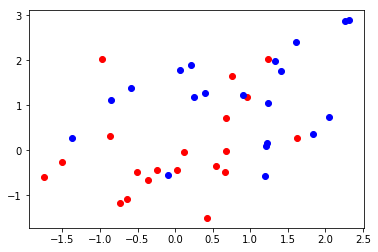

In [127]:
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivardata.pdf")

# Making a Prediction Grid

In [129]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """"Classify each point on the prediction grid."""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p= np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return xx, yy, prediction_grid
    
make_prediction_grid()
            

# Plotting the Prediction Grid

In [152]:
predictors, outcomes = generate_synth_data()
k=5;
filename ="knn_synth_5.pdf"; limits=(-3, 4, -3, 4); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
#plot_prediction_grid(xx, yy, prediction_grid, filename)


# Applying the kNN Method

In [154]:
!pip install sklearn
from sklearn import datasets
iris = datasets.load_iris()
iris

    100% |████████████████████████████████| 12.4MB 63kB/s  eta 0:00:01  10% |███▍                            | 1.3MB 9.8MB/s eta 0:00:02    13% |████▍                           | 1.7MB 7.3MB/s eta 0:00:02    16% |█████▍                          | 2.1MB 10.0MB/s eta 0:00:02    19% |██████▎                         | 2.4MB 7.6MB/s eta 0:00:02    31% |██████████▏                     | 3.9MB 7.0MB/s eta 0:00:02    37% |████████████▏                   | 4.7MB 15.9MB/s eta 0:00:01    69% |██████████████████████▎         | 8.6MB 15.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... error
  Complete output from command /srv/venv/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-__56vd50/sklearn/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpvz6v23mkpip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

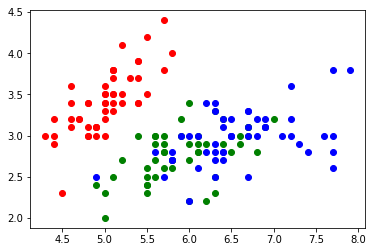

In [155]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")
plt.show()

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

sk_predictions.shape

sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [164]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [167]:
print(100*np.mean(sk_predictions == my_predictions))

33.324444444444445


In [168]:
print(100*np.mean(sk_predictions == outcomes))
print(100*np.mean(my_predictions == outcomes))

83.33333333333334
33.33333333333333
